In [71]:
import pandas as pd
from sklearn.linear_model import LinearRegression  
import seaborn as sys
import matplotlib.pyplot as plt


In [72]:
def fmt(x):
    return '%.2f' % x
pd.set_option('display.float_format',fmt)

In [62]:
data = pd.read_excel('date_wise_sale.xlsx')

In [5]:
data.isnull().sum()

date    0
amt     0
dtype: int64

In [6]:
data.head()

,date,amt
0,2023-01-01,122306240.95
1,2023-01-02,155396614.06
2,2023-01-03,133755242.48
3,2023-01-04,163311708.56
4,2023-01-05,150782883.67


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    145 non-null    datetime64[ns]
 1   amt     145 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [8]:
data['year']=data.date.dt.year

In [9]:
data.head()

,date,amt,year,month,day,week,qtr,weekday,is_weekend
0,2023-01-01,122306240.95,2023,1,1,52,1,6,1
1,2023-01-02,155396614.06,2023,1,2,1,1,0,0
2,2023-01-03,133755242.48,2023,1,3,1,1,1,0
3,2023-01-04,163311708.56,2023,1,4,1,1,2,0
4,2023-01-05,150782883.67,2023,1,5,1,1,3,0


In [10]:
data['month']=data.date.dt.month

In [11]:
data.head()

,date,amt,year,month
0,2023-01-01,122306240.95,2023,1
1,2023-01-02,155396614.06,2023,1
2,2023-01-03,133755242.48,2023,1
3,2023-01-04,163311708.56,2023,1
4,2023-01-05,150782883.67,2023,1


In [12]:
data['day']=data.date.dt.day

In [13]:
data.head()

,date,amt,year,month,day
0,2023-01-01,122306240.95,2023,1,1
1,2023-01-02,155396614.06,2023,1,2
2,2023-01-03,133755242.48,2023,1,3
3,2023-01-04,163311708.56,2023,1,4
4,2023-01-05,150782883.67,2023,1,5


In [14]:
data['week']=data.date.dt.isocalendar().week
data['qtr']=data.date.dt.quarter


In [15]:
data['weekday']=data.date.dt.weekday

In [16]:
weekend=[]
for i in data.weekday:
    if i==6 or i==5:
        weekend.append(1)
    else:
        weekend.append(0)

In [17]:
data['is_weekend']=weekend

In [58]:
data.head()

,date,amt,year,month,day,week,qtr,weekday,is_weekend
0,2023-01-01,122306240.95,2023,1,1,52,1,6,1
1,2023-01-02,155396614.06,2023,1,2,1,1,0,0
2,2023-01-03,133755242.48,2023,1,3,1,1,1,0
3,2023-01-04,163311708.56,2023,1,4,1,1,2,0
4,2023-01-05,150782883.67,2023,1,5,1,1,3,0


In [45]:
final_data=data.drop('date',axis=1)
final_data.head()

,amt,year,month,day,week,qtr,weekday,is_weekend
0,122306240.95,2023,1,1,52,1,6,1
1,155396614.06,2023,1,2,1,1,0,0
2,133755242.48,2023,1,3,1,1,1,0
3,163311708.56,2023,1,4,1,1,2,0
4,150782883.67,2023,1,5,1,1,3,0


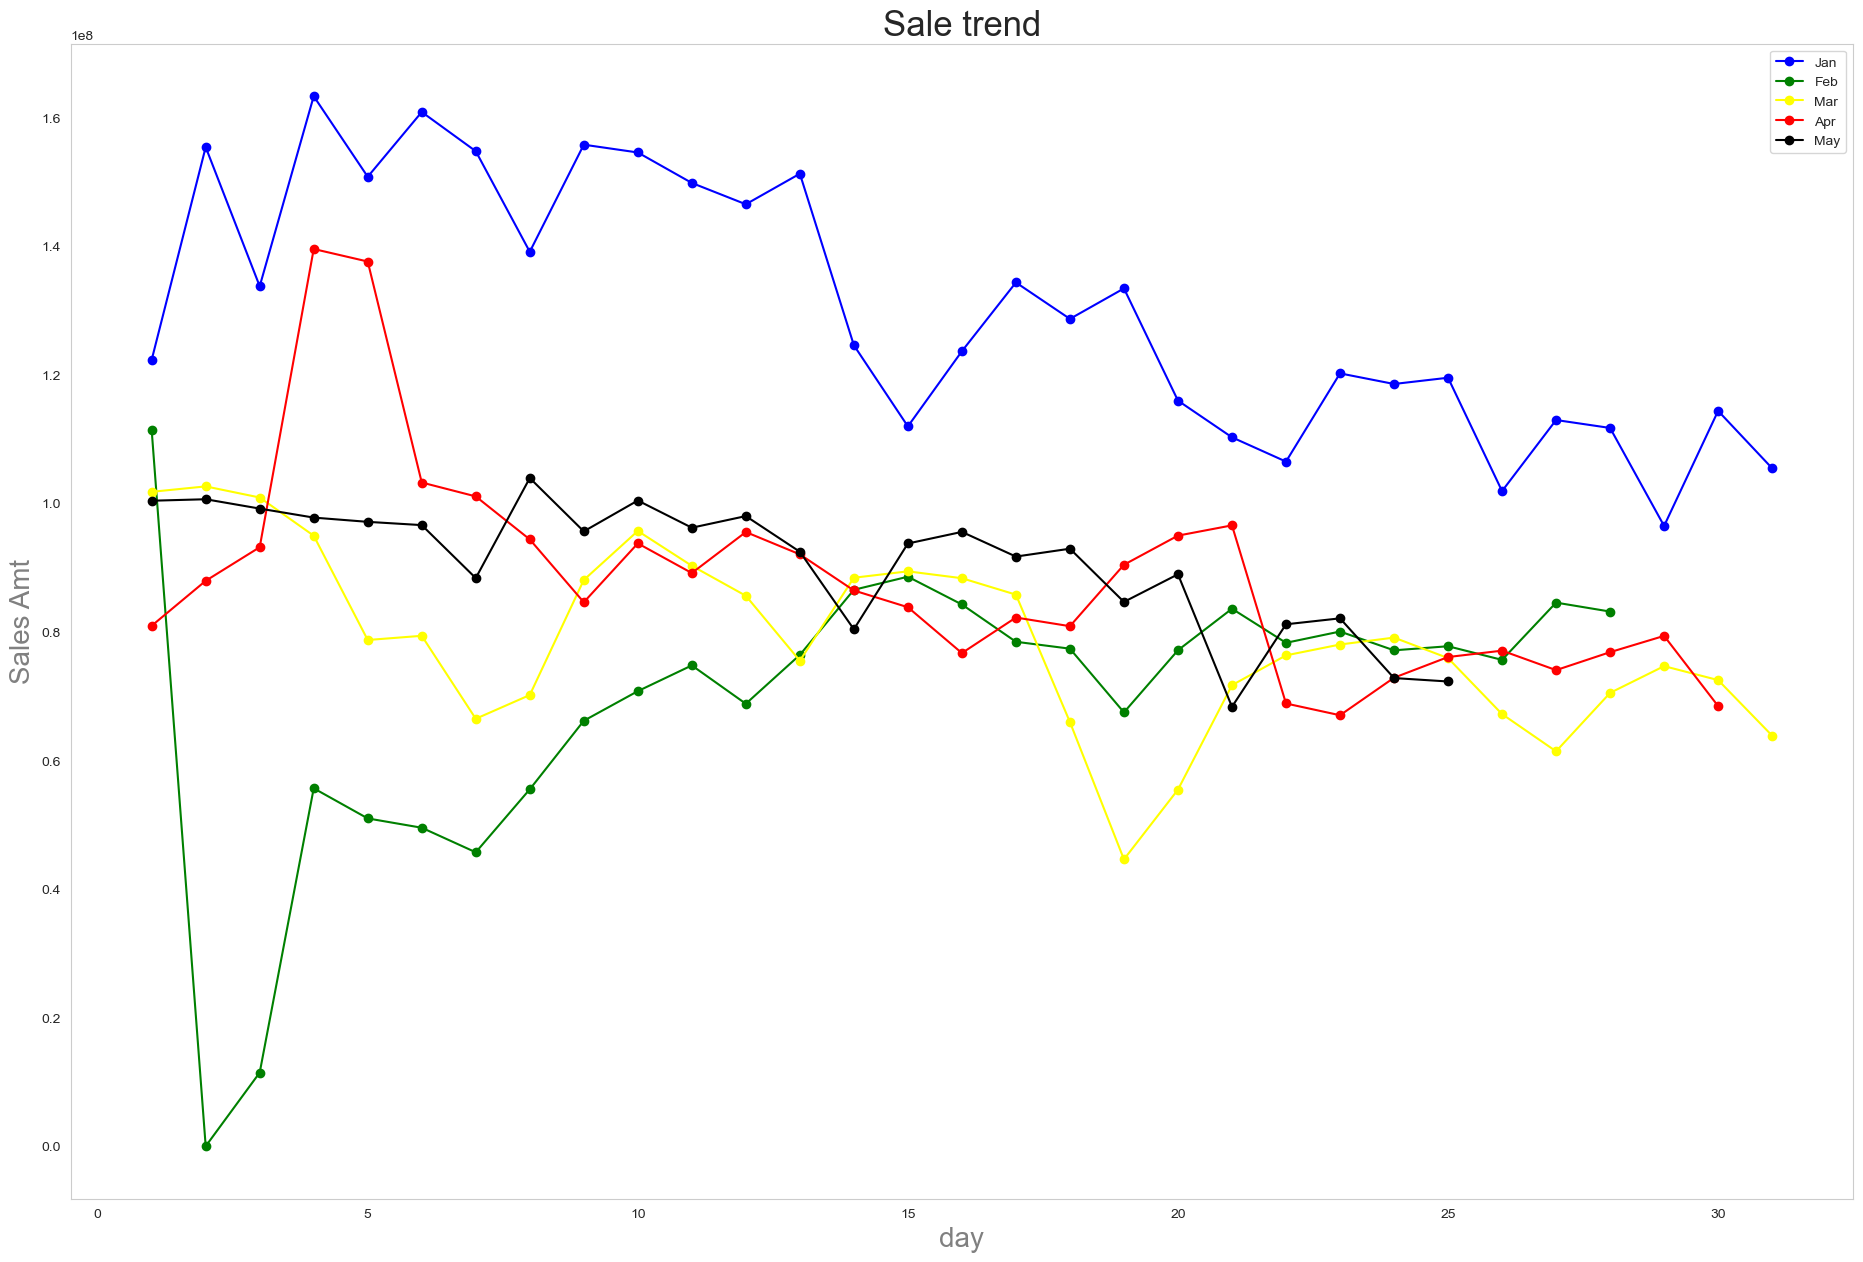

In [83]:
jan=final_data[final_data.month==1]
feb=final_data[final_data.month==2]
march=final_data[final_data.month==3]
april=final_data[final_data.month==4]
may=final_data[final_data.month==5]



plt.figure(figsize=(23,15))
plt.plot(jan.day,jan.amt,color='blue',linestyle='solid',marker='o')

plt.plot(feb.day,feb.amt,color='green',linestyle='solid',marker='o')

plt.plot(march.day,march.amt,color='yellow',linestyle='solid',marker='o')

plt.plot(april.day,april.amt,color='red',linestyle='solid',marker='o')

plt.plot(may.day,may.amt,color='black',linestyle='solid',marker='o')


plt.xlabel("day",size=20,color="#808080")
plt.ylabel("Sales Amt",size=20,color="#808080")
plt.title("Sale trend",size=25) 
#for y,x in zip (jan.amt,jan.day):
#    plt.text(x,y+10000000,round(y,2),size=10,color='b')

#for y,x in zip (feb.amt,feb.day):
#    plt.text(x,y+10000000,round(y,2),size=10,color='g')

#for y,x in zip (march.amt,march.day):
 #   plt.text(x,y+10000,round(y,2),size=15,color='y')

#for y,x in zip (april.amt,april.day):
#    plt.text(x,y+25000,round(y,2),size=15,color='r')    
    
#for y,x in zip (may.amt,may.day):
 #   plt.text(x,y+25000,round(y,2),size=15,color='black')// ##
    
plt.grid()
plt.legend(['Jan','Feb','Mar','Apr','May'])
plt.show()

In [51]:
X=final_data.iloc[:,1:8].values
y=final_data.iloc[:,0].values


In [52]:
X

array([[2023, 1, 1, ..., 1, 6, 1],
       [2023, 1, 2, ..., 1, 0, 0],
       [2023, 1, 3, ..., 1, 1, 0],
       ...,
       [2023, 5, 23, ..., 2, 1, 0],
       [2023, 5, 24, ..., 2, 2, 0],
       [2023, 5, 25, ..., 2, 3, 0]], dtype=object)

In [53]:
model= LinearRegression()  


In [54]:
model.fit(X, y)  

LinearRegression()

In [57]:
model.predict([[2023,5,26,21,2,4,0]])

array([71165645.1883617])